<a href="https://colab.research.google.com/github/madekrisnaj/eCommerce-Business-Data-Mining/blob/main/ECommerce_Business_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Understanding the Business Case**

eCommerce behavior data from multi category store contains behavior data for 7 months from a large multicategory online store. Each row in the file represents an event. All events are related to products and users. Each event is like many to many relation between products and users.

To see more detailed information, please visit the file at the link : [eCommerce Data Mining Analysis (by: I Made Krisna Jaya)](https://drive.google.com/file/d/1FaPTYw_JtDG3_Dy6zG4oQYW9SeJr9Fbl/view?usp=sharing)

# **2. Prepare The Environtment**

In [ ]:
#Install Kaggle to download dataset from kaggle
pip install -q kaggle

In [ ]:
#Get connect to google drive directory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Set the directory in google drive
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Dibimbing Bootcamp/Data Mining Project'

In [ ]:
#Import the API key to connect to kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madekrisnajaya","key":"45fa38283282239f7bfbbe7c58e2fc21"}'}

In [ ]:
#Make kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download dataset from kaggle
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store

100% 4.29G/4.29G [01:24<00:00, 73.9MB/s]



In [ ]:
#Extract downloaded dataset
import zipfile
zip_ref = zipfile.ZipFile('ecommerce-behavior-data-from-multi-category-store.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
#Import Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

# **3. Import Dataset**

In [ ]:
#Import Dataset
df = pd.read_csv('/content/files/2019-Oct.csv')

In [ ]:
#display top 5 data
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


# **Data Cleansing**

#### Duplicates Data

In [ ]:
#Remove the duplicates Data
df.drop_duplicates(inplace=True)

#### Remove Not Used Columns

In [ ]:
df.drop(columns=['category_id'],inplace=True)

#### Handling Missing Value

In [ ]:
#Calculaton percent of missing value for each columns
round(df.isnull().sum()/df.shape[0]*100,2)

event_time        0.00
event_type        0.00
product_id        0.00
category_code    31.85
brand            14.42
price             0.00
user_id           0.00
user_session      0.00
dtype: float64

Here we assume that there are product that do not have a brand, so they are replaced with nobrand

We don't eliminate products that don't have categories because we want to see the overall data visualization, so they are replaced with nocategory

In [ ]:
#Fill the missing value in category_code with nocategory and in brand with nobrand

df['category_code'].fillna('nocategory', inplace=True)
df['brand'].fillna('nobrand', inplace=True)

#### Check Outlier data

In [ ]:
#Get the descriptive statistic from the numerical columns
df.describe()

,product_id,price,user_id
count,4.241854e+07,4.241854e+07,4.241854e+07
mean,1.055512e+07,2.903133e+02,5.335329e+08
std,1.188364e+07,3.582973e+02,1.852309e+07
min,1.000978e+06,0.000000e+00,3.386938e+07
25%,1.005158e+06,6.590000e+01,5.159029e+08
50%,5.000478e+06,1.627300e+02,5.296881e+08
75%,1.600048e+07,3.585700e+02,5.515643e+08
max,6.050001e+07,2.574070e+03,5.662809e+08


In [ ]:
#Calculating the interquantile value
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

product_id    14995327.00
price              292.67
user_id       35661391.00
dtype: float64


Here we just see the outlier in price, because product_id and user_id are not numeric data types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


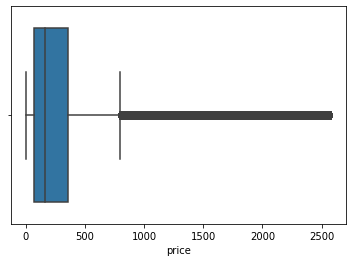

In [ ]:
#Visualize the price boxplot to see the outlier
sns.boxplot(df['price'])

In [ ]:
#See the outlier data
df[df['price'] > (df['price'].quantile(0.75)+1.5*292.67)]

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
4,2019-10-01 00:00:04 UTC,view,1004237,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
11,2019-10-01 00:00:11 UTC,view,1005011,electronics.smartphone,samsung,900.64,530282093,50a293fb-5940-41b2-baf3-17af0e812101
19,2019-10-01 00:00:19 UTC,view,1005135,electronics.smartphone,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
22,2019-10-01 00:00:22 UTC,view,1480714,computers.desktop,pulser,921.49,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
...,...,...,...,...,...,...,...,...
42448662,2019-10-31 23:59:17 UTC,view,1801573,electronics.video.tv,sony,926.41,554176247,c58c6f70-fb69-4196-9986-3d246ec30cbd
42448667,2019-10-31 23:59:19 UTC,view,1003319,electronics.smartphone,apple,1067.98,522235989,6f6c15ce-b3e9-41e0-8852-44cc21183595
42448699,2019-10-31 23:59:33 UTC,view,1004237,electronics.smartphone,apple,1091.33,519277091,62fadce6-aa4a-4dde-92fc-c04c22982df5
42448728,2019-10-31 23:59:47 UTC,view,1005135,electronics.smartphone,apple,1665.36,536554637,814dd3f8-970e-4a98-8e84-9d3fb6375604


There are 3.668.541 outlier price data. We don't need to remove the outlier because that is a true outlier

#### Handling Invalid Data Types

In [ ]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [ ]:
#Change the invalid data types
df['event_time']=pd.to_datetime(df['event_time']).dt.tz_convert(None)
df['event_type']=df['event_type'].astype('category')
df['category_code']=df['category_code'].astype('category')

In [ ]:
df.dtypes

event_time       datetime64[ns]
event_type             category
product_id                int64
category_code          category
brand                    object
price                   float64
user_id                   int64
user_session             object
dtype: object

In [ ]:
#Save cleaned data to google drive
df.to_csv('/content/drive/MyDrive/Dibimbing Bootcamp/Data Mining Project/datasets.csv')

# **Exploratory Data Analysis**

In [ ]:
#create grouping based on event_time
daily_summary_table=df.groupby(by=[df['event_time'].dt.normalize()]).agg(Number_of_daily_visits=('user_session',lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors=('user_id',lambda x: x.nunique())
                                                                                  )
sales_filter=df['event_type']=='purchase'
sales=df.loc[sales_filter].groupby(by=[df['event_time'].dt.normalize()]).agg(number_of_daily_sales=('event_type','count'),
                                                                                      Total_daily_sales=('price','sum')
                                                                                      ).reset_index()
daily_summary_table=pd.merge(left=daily_summary_table,
                          right=sales,
                          left_on=['event_time'],
                          right_on=['event_time'],
                          how='left')
daily_summary_table['conversion_rate']=daily_summary_table['number_of_daily_sales']/daily_summary_table['Number_of_daily_visits']

Daily Visits Statistics
--------------------------------------------------
count        31.000000
mean     299510.548387
std       25531.553700
min      241086.000000
25%      278957.500000
50%      301219.000000
75%      319668.500000
max      339943.000000
Name: Number_of_daily_visits, dtype: float64
--------------------------------------------------
Visit Statistics by Dates
--------------------------------------------------
            count       mean           std  ...       50%        75%       max
event_time                                  ...                               
Friday        4.0  321772.50  16017.261304  ...  325731.0  333799.50  334977.0
Monday        4.0  293353.00  26033.151442  ...  294346.5  311089.50  321282.0
Saturday      4.0  298041.75  19140.215435  ...  296976.5  308605.50  321300.0
Sunday        4.0  309080.00  32756.353552  ...  311671.5  335116.75  339943.0
Thursday      5.0  282820.60  24557.356776  ...  293587.0  295142.00  302842.0
Tuesday       5

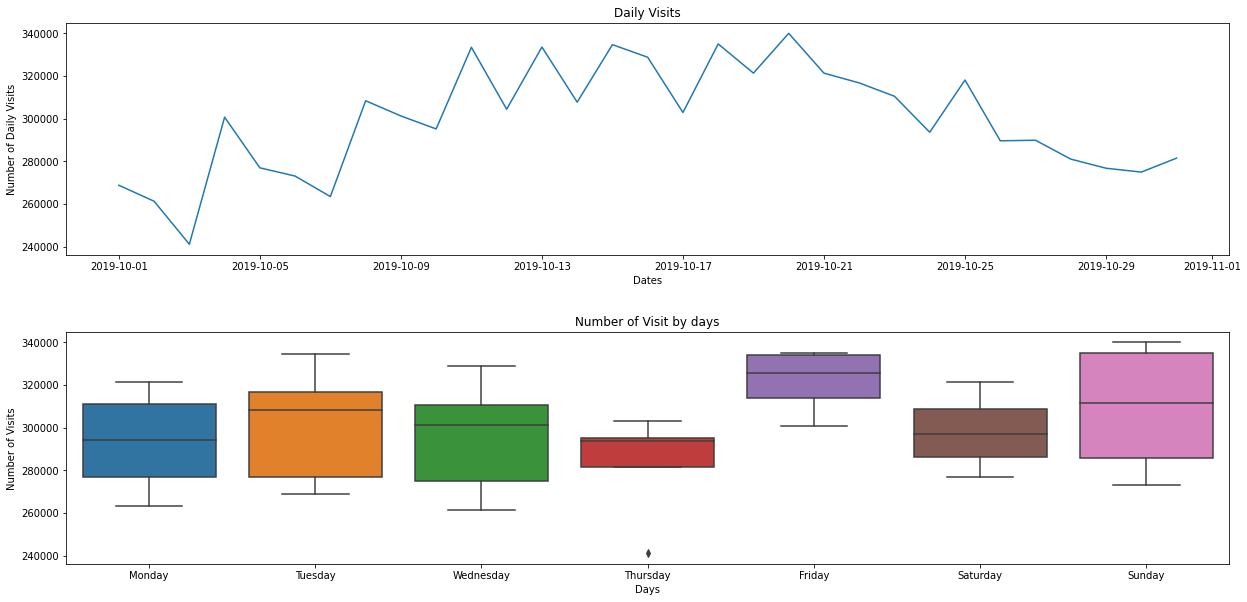

In [ ]:
#Daily Visits
print('Daily Visits Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visits'].describe())
print('-'*50)
print('Visit Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visits'].describe())

#Plotting number of daily visits
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visits',
              data=daily_summary_table,
             ax=ax1)
plt.title('Daily Visits')
plt.ylabel('Number of Daily Visits')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)

sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visits',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visit by days')
plt.ylabel('Number of Visits')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

Daily Visitor Statistics
--------------------------------------------------
count        31.000000
mean     208829.774194
std       16233.609920
min      170668.000000
25%      195260.500000
50%      208477.000000
75%      223321.000000
max      231849.000000
Name: Number_of_daily_visitors, dtype: float64
--------------------------------------------------
Visitor Statistics by Dates
--------------------------------------------------
            count       mean           std  ...       50%        75%       max
event_time                                  ...                               
Friday        4.0  223166.00   9715.295466  ...  226360.5  229730.50  230533.0
Monday        4.0  204218.00  16732.498877  ...  202326.0  213134.00  225269.0
Saturday      4.0  205851.25   9731.790975  ...  205263.5  210746.25  217920.0
Sunday        4.0  213090.00  18707.438325  ...  213650.5  227418.75  231849.0
Thursday      5.0  197994.80  15736.888740  ...  205321.0  206937.00  208477.0
Tuesday   

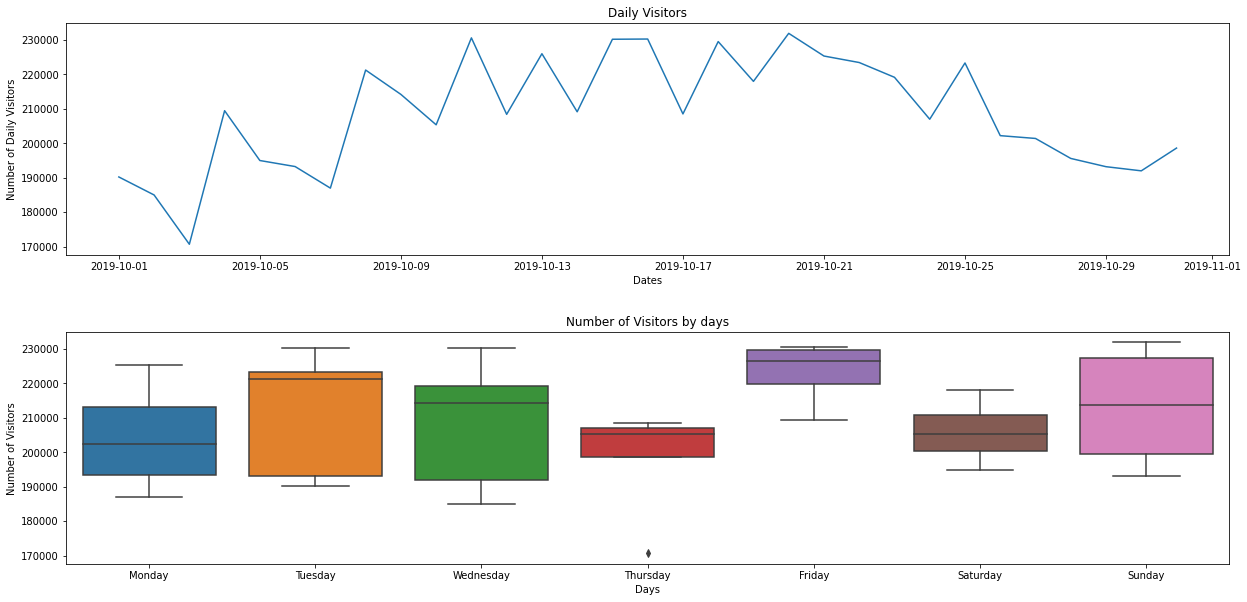

In [ ]:
#Daily Visitors
print('Daily Visitor Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visitors'].describe())
print('-'*50)
print('Visitor Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visitors'].describe())

#Plotting number of daily visitors
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visitors',
              data=daily_summary_table,
            ax=ax1)
plt.title('Daily Visitors')
plt.ylabel('Number of Daily Visitors')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visitors',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visitors by days')
plt.ylabel('Number of Visitors')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

Conversion Rates Statistics
--------------------------------------------------
count    31.000000
mean      0.079887
std       0.006347
min       0.071406
25%       0.075109
50%       0.078655
75%       0.081470
max       0.095494
Name: conversion_rate, dtype: float64
--------------------------------------------------
Conversion Rates Statistics by Dates
--------------------------------------------------
            count      mean       std  ...       50%       75%       max
event_time                             ...                              
Friday        4.0  0.080212  0.006645  ...  0.077911  0.081475  0.089935
Monday        4.0  0.081730  0.007474  ...  0.079739  0.083942  0.092316
Saturday      4.0  0.080791  0.003913  ...  0.080794  0.083730  0.084835
Sunday        4.0  0.081099  0.006051  ...  0.080967  0.083055  0.088637
Thursday      5.0  0.080207  0.008502  ...  0.079868  0.081744  0.093504
Tuesday       5.0  0.075845  0.003512  ...  0.074821  0.078802  0.080147
Wednesda

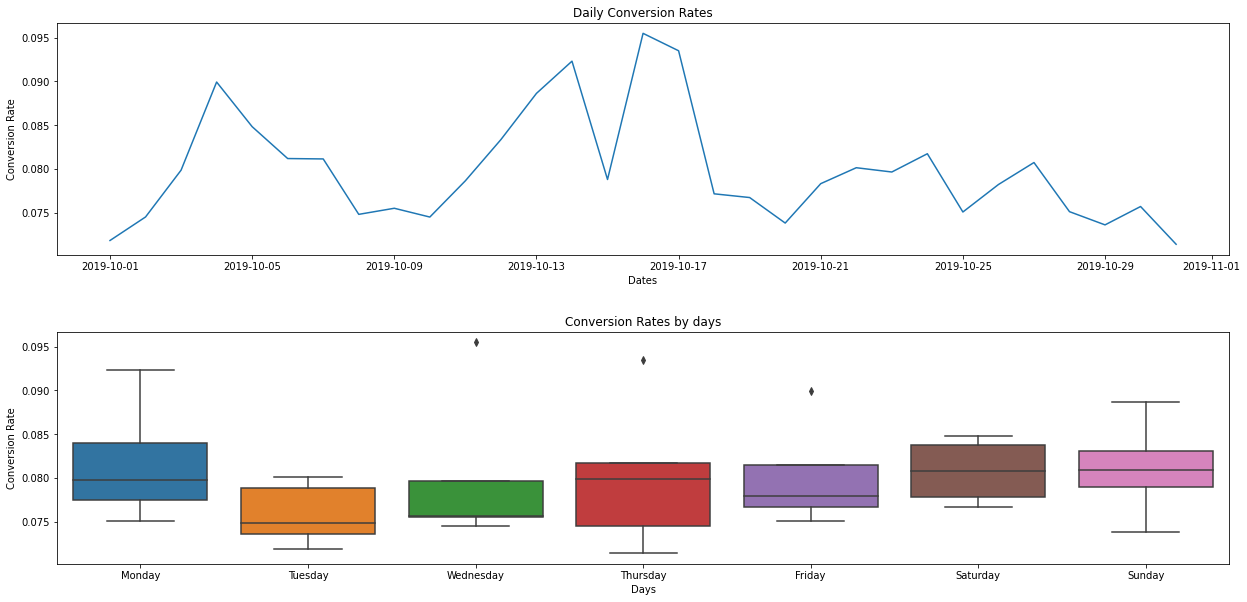

In [ ]:
#Conversion rates
print('Conversion Rates Statistics')
print('-'*50)
print(daily_summary_table['conversion_rate'].describe())
print('-'*50)
print('Conversion Rates Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['conversion_rate'].describe())

#Plotting convergance rates
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='conversion_rate',
              data=daily_summary_table,
            ax=ax1)
plt.title('Daily Conversion Rates')
plt.ylabel('Conversion Rate')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)
sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='conversion_rate',
            data=daily_summary_table,
           ax=ax2)
plt.title('Conversion Rates by days')
plt.ylabel('Conversion Rate')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

#### Customer Analysis

In [ ]:
sales_filter=df['event_type']=='purchase'
Customer_table=df.loc[sales_filter].groupby(by=['user_id']).agg(number_of_purchases=('user_id','count'),
                                                                     total_sales=('price','sum')).reset_index()

In [ ]:
#Calculating number of customers who bought something
Number_of_customers_who_bought_smt=Customer_table['user_id'].nunique()
print('There are {:,.0f} customers, who purchased in October.'.format(Number_of_customers_who_bought_smt))

#Calculating number of purchase activities for each customer
print('-'*50)
print('Distribution of Customer by Number of Purchases')
print(Customer_table['number_of_purchases'].value_counts(normalize=True).head(10))
#Calculationg repeat customers number
print('-'*50)
more_than_one_purchase_filter=Customer_table['number_of_purchases']>1
Number_of_customers_who_bought_more_than_once=Customer_table.loc[more_than_one_purchase_filter].shape[0]
print('There are {:,.0f} repeat customers, who bought more than once.'.format(Number_of_customers_who_bought_more_than_once))

There are 347,118 customers, who purchased in October.
--------------------------------------------------
Distribution of Customer by Number of Purchases
1     0.621431
2     0.188890
3     0.074525
4     0.037670
5     0.021192
6     0.013517
7     0.009049
8     0.006476
9     0.004834
10    0.003385
Name: number_of_purchases, dtype: float64
--------------------------------------------------
There are 131,408 repeat customers, who bought more than once.


In [ ]:
#Most valuable customers

#filtering customer with top %10 purchase amount
top10perc_sales_amount=np.percentile(Customer_table['total_sales'],90)
filter_top10perc_sales_amount=Customer_table['total_sales']>=top10perc_sales_amount
top10perc_customers_with_hightest_turnover=Customer_table.loc[filter_top10perc_sales_amount]
regular_customers=Customer_table.loc[~filter_top10perc_sales_amount]

#calculating descriptive statistics
print('Top 10% customers Purchase Amount-Descriptive Statistics')
print('-'*50)
print(top10perc_customers_with_hightest_turnover['total_sales'].describe())
print('-'*50)
total_sales_amount=Customer_table['total_sales'].sum()
print('Total sales: {:,.0f}'.format(total_sales_amount))
total_sales_amount_top10perc=top10perc_customers_with_hightest_turnover['total_sales'].sum()
print('Total sales of top 10% customers: {:,.0f}'.format(total_sales_amount_top10perc))

#calculating descriptive statistics
print('Regular customers Purchase Amount-Descriptive Statistics')
print('-'*50)
print(regular_customers['total_sales'].describe())
print('-'*50)
total_sales_amount_regular_customers=regular_customers['total_sales'].sum()
print('Total sales of regular customers: {:,.0f}'.format(total_sales_amount_regular_customers))

Top 10% customers Purchase Amount-Descriptive Statistics
--------------------------------------------------
count     34781.000000
mean       3730.465088
std        5620.445256
min        1418.050000
25%        1741.340000
50%        2335.420000
75%        3766.790000
max      265569.520000
Name: total_sales, dtype: float64
--------------------------------------------------
Total sales: 229,933,213
Total sales of top 10% customers: 129,749,306
Regular customers Purchase Amount-Descriptive Statistics
--------------------------------------------------
count    312337.000000
mean        320.755807
std         314.502807
min           0.880000
25%          94.210000
50%         204.870000
75%         442.180000
max        1418.040000
Name: total_sales, dtype: float64
--------------------------------------------------
Total sales of regular customers: 100,183,906


#### Category Analysis

In [ ]:
def extract_categorycode(input_text,level=0):
    '''
     this function splits category code and returns the first part.
    '''
    output_text=input_text.split('.')[level]
    return output_text

In [ ]:
df['category']=df['category_code'].apply(extract_categorycode,level=0)

In [ ]:
#create grouping based on category
category_summary_table=df.groupby(by=['category']).agg(Number_of_views=('category','count'),
                                                              Number_of_users=('user_id',lambda x: x.nunique()),
                                                              Number_of_sessions=('user_session',pd.Series.nunique)).reset_index()
sales_filter=df['event_type']=='purchase'
category_sales_summary_table=df.loc[sales_filter].groupby(by=['category']).agg(Number_of_purchase=('category','count'),
                                                                                      Amount_of_purchase=('price','sum'),
                                                                                      Average_purchase_amount=('price','mean'),
                                                                                      Number_of_sessions_with_purchase=('user_session',pd.Series.nunique),
                                                                                      Number_of_shoppers=('user_id',lambda x: x.nunique())).reset_index()
category_summary_table=pd.merge(left=category_summary_table,
                               right=category_sales_summary_table,
                               left_on='category',
                               right_on='category',
                               how='left')
category_summary_table['Conversion_rate']=category_summary_table['Number_of_purchase']/category_summary_table['Number_of_sessions']

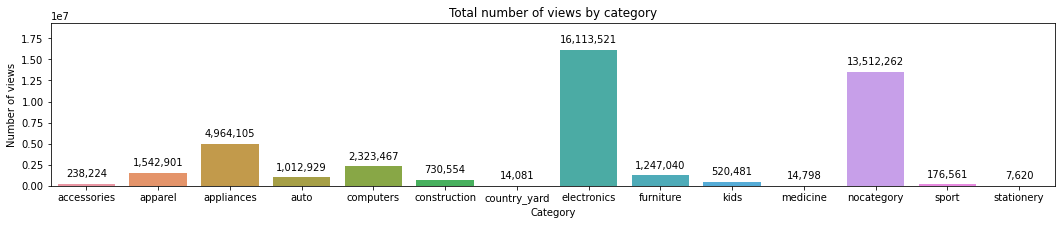

In [ ]:
#Visualize total number of views by category
plt.figure(figsize=(18,3))
plot = sns.barplot(x='category',y='Number_of_views',data=category_summary_table)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.title('Total number of views by category')
plt.xlabel('Category')
plt.ylabel('Number of views')
plt.ylim(0,category_summary_table['Number_of_views'].max()*1.2);

(0.0, 2020203.5999999999)

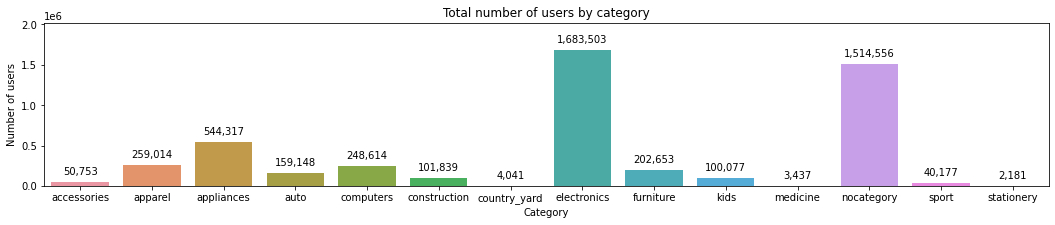

In [ ]:
#Visualize total number of users by category
plt.figure(figsize=(18,3))
plot = sns.barplot(x='category',y='Number_of_users',data=category_summary_table)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.title('Total number of users by category')
plt.xlabel('Category')
plt.ylabel('Number of users')
plt.ylim(0,category_summary_table['Number_of_users'].max()*1.2)

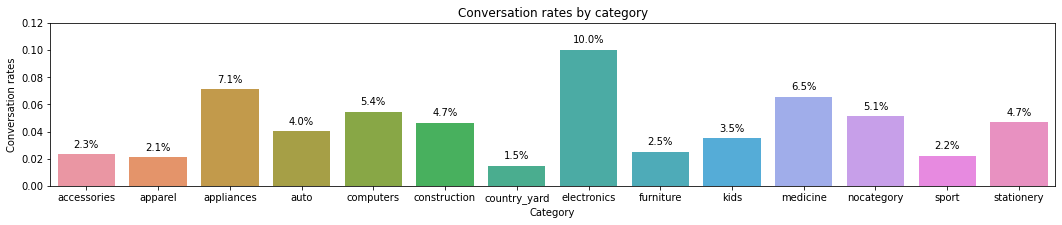

In [ ]:
#Visualize conversation rates by category
plt.figure(figsize=(18,3))
plot = sns.barplot(x='category',y='Conversion_rate',data=category_summary_table)
for p in plot.patches:
    plot.annotate("{:.1%}".format(p.get_height()),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.title('Conversation rates by category')
plt.xlabel('Category')
plt.ylabel('Conversation rates')
plt.ylim(0,category_summary_table['Conversion_rate'].max()*1.2);

In [ ]:
category_subcategory_summary_table=df.groupby(by=['category']).agg(Number_of_views=('category','count'),
                                                              Number_of_users=('user_id',lambda x: x.nunique()),
                                                              Number_of_sessions=('user_session',pd.Series.nunique)).reset_index()
                                
sales_filter=df['event_type']=='purchase'
category_subcategory_sales_summary_table=df.loc[sales_filter].groupby(by=['category']).agg(Number_of_purchase=('category','count'),
                                                                                      Amount_of_purchase=('price','sum'),
                                                                                      Average_purchase_amount=('price','mean'),
                                                                                      Number_of_sessions_with_purchase=('user_session',pd.Series.nunique),
                                                                                      Number_of_shoppers=('user_id',lambda x: x.nunique())).reset_index()
category_subcategory_summary_table=pd.merge(left=category_subcategory_summary_table,
                               right=category_subcategory_sales_summary_table,
                               left_on=['category'],
                               right_on=['category'],
                               how='left')
category_subcategory_summary_table['Conversion_rate']=category_subcategory_summary_table['Number_of_purchase']/category_subcategory_summary_table['Number_of_sessions']
category_subcategory_summary_table['category']=category_subcategory_summary_table['category']

category_subcategory_summary_table_sorted=category_subcategory_summary_table.sort_values(by='Number_of_views', ascending=False)

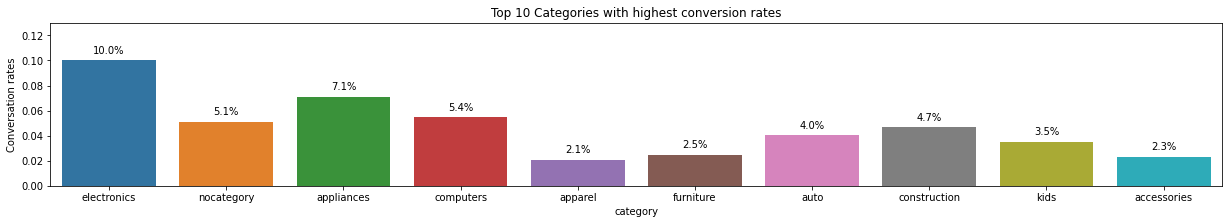

In [ ]:
plt.figure(figsize=(21,3))
plot = sns.barplot(x='category',y='Conversion_rate',data=category_subcategory_summary_table_sorted.head(10))
for p in plot.patches:
    plot.annotate("{:.1%}".format(p.get_height()),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.title('Top 10 Categories with highest conversion rates')
plt.ylabel('Conversation rates')
plt.ylim(0,category_summary_table['Conversion_rate'].max()*1.3);

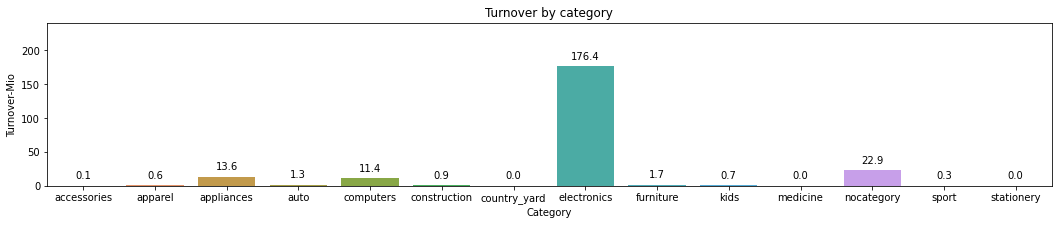

In [ ]:
category_turnover_table=category_summary_table.groupby(by=['category']).agg(total_turnover=('Amount_of_purchase','sum')).reset_index()
category_turnover_table['total_turn_over_mio']=category_turnover_table['total_turnover']/1000000
#ploting the category turnover table 
plt.figure(figsize=(18,3))
plot = sns.barplot(x='category',y='total_turn_over_mio',data=category_turnover_table)

for p in plot.patches:
    plot.annotate(format(p.get_height(), ',.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.title('Turnover by category')
plt.xlabel('Category')
plt.ylabel('Turnover-Mio')
plt.ylim(0,plot.get_ybound()[1]*1.3);

### Event type Analysis

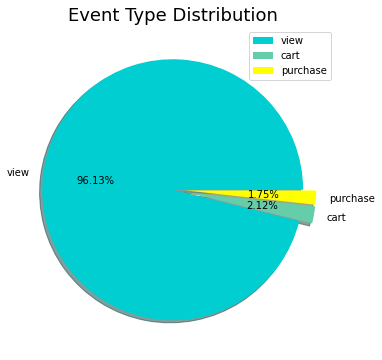

In [ ]:
#Visualize the Event Type Distribution
event = df['event_type'].value_counts()

plt.rcParams['figure.figsize'] = (8, 6)
plt.pie(event, colors = ['darkturquoise', 'mediumaquamarine','yellow'], explode = [0, 0.1,0.1], 
        labels = ['view', 'cart','purchase'], shadow = True, autopct = '%.2f%%')
plt.title('Event Type Distribution', fontsize = 18)
plt.axis('off')
plt.legend()
plt.show()